In [1]:
from sunRay import solarWind
import torch
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

In [2]:
xylim = [-250,250,-250,250]

z=0
x = torch.linspace(xylim[0],xylim[1],200)
y = torch.linspace(xylim[2],xylim[3],300)
xx, yy = torch.meshgrid(x, y)
zz=torch.ones(xx.shape)*z

rr =  torch.sqrt(xx*xx+yy*yy+zz*zz)
theta =  torch.acos(zz/rr)
fi = torch.atan2(yy,xx)

Bx,By,Bz = solarWind.ParkerBxyzEarth(rr,theta,fi)

# to avoid extreme value
Bx[torch.where(rr<3)]=0
By[torch.where(rr<3)]=0
Bz[torch.where(rr<3)]=0

BB =  torch.sqrt(Bx*Bx+By*By+Bz*Bz)

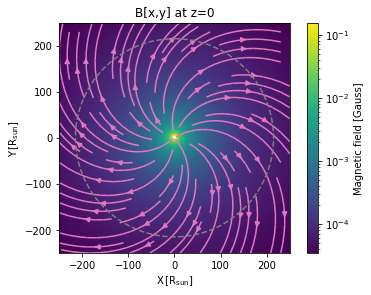

In [3]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes((0.1, 0.1, 0.8, 0.8), frameon=True, aspect='equal',
    adjustable='box', xlabel=r'$\rm X\,[R_{{sun}}]$',ylabel=r'$\rm Y\,[R_{sun}]$',title='B[x,y] at z='+str(z))

# BB
BBlog=ax.imshow(BB.T,extent=xylim,norm=LogNorm())
cbar = fig.colorbar(BBlog,label='Magnetic field [Gauss]')

# B vector slice
ax.streamplot(x.numpy(),y.numpy(),Bx.T,By.T,color='C6',density=0.8)

# 1AU
t_AU=np.linspace(0,2*np.pi,100)
ax.plot(215*np.sin(t_AU),215*np.cos(t_AU),'--',color='gray')
fig.savefig('bfieldxy.pdf',bbox_inches='tight')

In [4]:
xzlim = [-250,250,-250,250]

y=100
x = torch.linspace(xylim[0],xylim[1],300)
z = torch.linspace(xylim[2],xylim[3],300)
xx, zz = torch.meshgrid(x, z)
yy=torch.ones(xx.shape)*y

rr =  torch.sqrt(xx*xx+yy*yy+zz*zz)
theta =  torch.acos(zz/rr)
fi = torch.atan2(yy,xx)

Bx,By,Bz = solarWind.ParkerBxyzEarth(rr,theta,fi)

# to avoid extreme value
Bx[torch.where(rr<3)]=0
By[torch.where(rr<3)]=0
Bz[torch.where(rr<3)]=0

BB =  torch.sqrt(Bx*Bx+By*By+Bz*Bz)

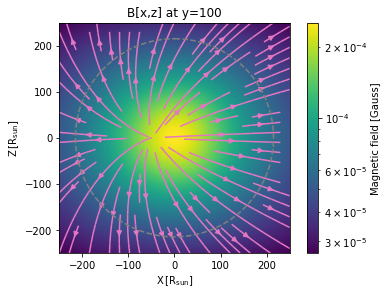

In [5]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes((0.1, 0.1, 0.8, 0.8), frameon=True, aspect='equal',
    adjustable='box', xlabel=r'$\rm X\,[R_{{sun}}]$',ylabel=r'$\rm Z\,[R_{sun}]$',title='B[x,z] at y='+str(y))

# BB
BBlog=ax.imshow(BB.T,extent=xylim,norm=LogNorm())
cbar = fig.colorbar(BBlog,label='Magnetic field [Gauss]')

# B vector slice
ax.streamplot(x.numpy(),z.numpy(),Bx.T,Bz.T,color='C6',density=0.8)

# 1AU
t_AU=np.linspace(0,2*np.pi,100)
ax.plot(215*np.sin(t_AU),215*np.cos(t_AU),'--',color='gray')
fig.savefig('bfieldxz1.pdf',bbox_inches='tight')